<a href="https://colab.research.google.com/github/Kuro-Sagi/hello-world/blob/main/automobile_sion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
import sklearn
# import ucimlrepo
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

---
# Access Dataset

### Download Dataset
We will access the dataset via. the URL. However, UCI does provide a Python library which you can use if desired: https://archive.ics.uci.edu/dataset/10/automobile

In [155]:
# Download the data to "automobile.zip"
import urllib
_, response = urllib.request.urlretrieve("https://archive.ics.uci.edu/static/public/10/automobile.zip", "automobile.zip")

In [156]:
# Unzip the data
from zipfile import ZipFile
with ZipFile("automobile.zip", "r") as zObj:
    zObj.extractall(path="automobile")

In [157]:
# Display the downloaded items
from pathlib import Path
print("[ Downloaded Files ]")
for idx, p in enumerate(Path("automobile").glob("*")):
    print(f"{idx}: {p}")

[ Downloaded Files ]
0: automobile/app.css
1: automobile/imports-85.names
2: automobile/imports-85.data
3: automobile/misc
4: automobile/Index


    Column Number          Attribute  Missing Values
0               1          symboling               0
1               2  normalized-losses              37
2               3               make               0
3               4          fuel-type               0
4               5         aspiration               0
5               6       num-of-doors               2
6               7         body-style               0
7               8       drive-wheels               0
8               9    engine-location               0
9              10         wheel-base               0
10             11             length               0
11             12              width               0
12             13             height               0
13             14        curb-weight               0
14             15        engine-type               0
15             16   num-of-cylinders               0
16             17        engine-size               0
17             18        fuel-system          

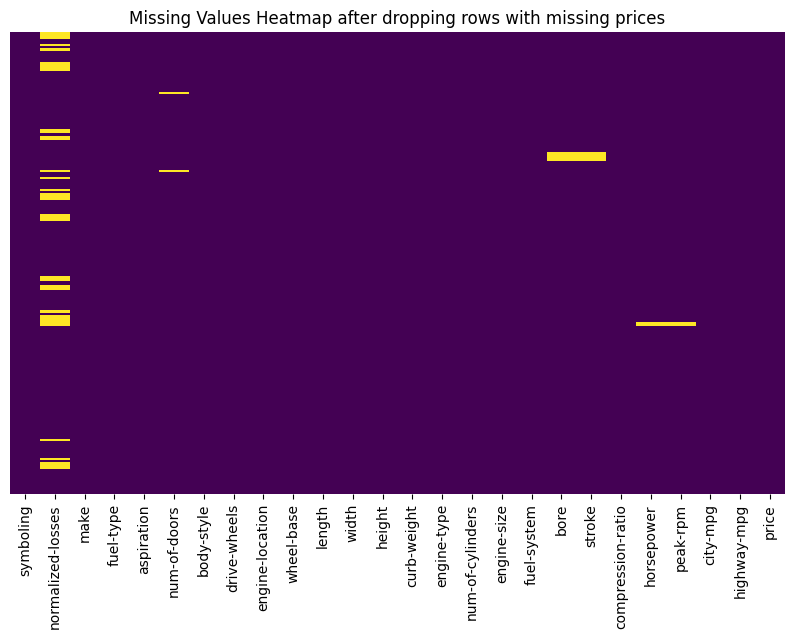

In [158]:
# Access the local data
fp = "automobile/imports-85.data"

# Data headers
header = [
    'symboling',
    'normalized-losses',
    'make',
    'fuel-type',
    'aspiration',
    'num-of-doors',
    'body-style',
    'drive-wheels',
    'engine-location',
    'wheel-base',
    'length',
    'width',
    'height',
    'curb-weight',
    'engine-type',
    'num-of-cylinders',
    'engine-size',
    'fuel-system',
    'bore',
    'stroke',
    'compression-ratio',
    'horsepower',
    'peak-rpm',
    'city-mpg',
    'highway-mpg',
    'price'
]

# Read the CSV file from the URL and assign column names
df = pd.read_csv(fp, names=header, na_values='?')

# Display the first few rows of the DataFrame
df

# Drop rows with missing prices
df_cleaned = df.dropna(subset=['price'])

# Verify the number of missing values for each attribute after dropping rows
missing_values_info_cleaned = df_cleaned.isnull().sum().reset_index()
missing_values_info_cleaned.columns = ['Attribute', 'Missing Values']
missing_values_info_cleaned.insert(0, 'Column Number', missing_values_info_cleaned.index + 1)  # Adding 1 to match 1-based indexing

print(missing_values_info_cleaned)

# Create a heatmap of missing values for the cleaned DataFrame
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap after dropping rows with missing prices')
plt.show()

## Access data directly via. URL

You can optionally access the data directly via. the provided URL.

In [159]:
# import pandas as pd

# url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'

# # Read the CSV file from the URL and assign column names
# df = pd.read_csv(url, names=header, na_values='?')

# # Display the first few rows of the DataFrame
# df

---
# Breakout Session 1
Univariate Analysis to understand the distributions and central tendencies of individual features.

### Objective:​

To delve into the characteristics and distributions of individual features within the dataset.​

### Agenda:​

Data Preprocessing: pre-process the dataset to ensure quality and consistency by handling missing values.​

Visualise Feature Distributions: Utilise histograms, box plots, and other suitable plots to visualise feature distributions and discuss their central tendencies (mean, median, mode).​

Descriptive Statistics: Generate summary statistics to provide insights into the numerical attributes of the dataset by highlighting key metrics such as mean, standard deviation, and quartiles.​

Key Insights and Preliminary Findings: Identify patterns, trends, and outliers within individual features and formulating preliminary findings.

### Deliverables:

Cleaned and pre-processed dataset ready for analysis.​

Descriptive statistics summary highlighting key numerical attributes.​

Visualizations showcasing feature distributions and central tendencies.​

Preliminary findings document outlining initial observations and potential areas for exploration.​

In [160]:
# Clean the dataset to handle missing values and ensure consistency (see additional instructions at the end of this task).


In [161]:
# Familiarise yourself with the different features available in the dataset.
...

In [162]:
# Explore individual features to understand their distributions and central tendencies.
...

       normalized-losses  wheel-base  length   width  height  curb-weight  \
count             164.00      205.00  205.00  205.00  205.00       205.00   
mean              122.00       98.76  174.05   65.91   53.72      2555.57   
std                35.44        6.02   12.34    2.15    2.44       520.68   
min                65.00       86.60  141.10   60.30   47.80      1488.00   
25%                94.00       94.50  166.30   64.10   52.00      2145.00   
50%               115.00       97.00  173.20   65.50   54.10      2414.00   
75%               150.00      102.40  183.10   66.90   55.50      2935.00   
max               256.00      120.90  208.10   72.30   59.80      4066.00   

       engine-size    bore  stroke  compression-ratio  horsepower  peak-rpm  \
count       205.00  201.00  201.00             205.00      203.00    203.00   
mean        126.91    3.33    3.26              10.14      104.26   5125.37   
std          41.64    0.27    0.32               3.97       39.71    

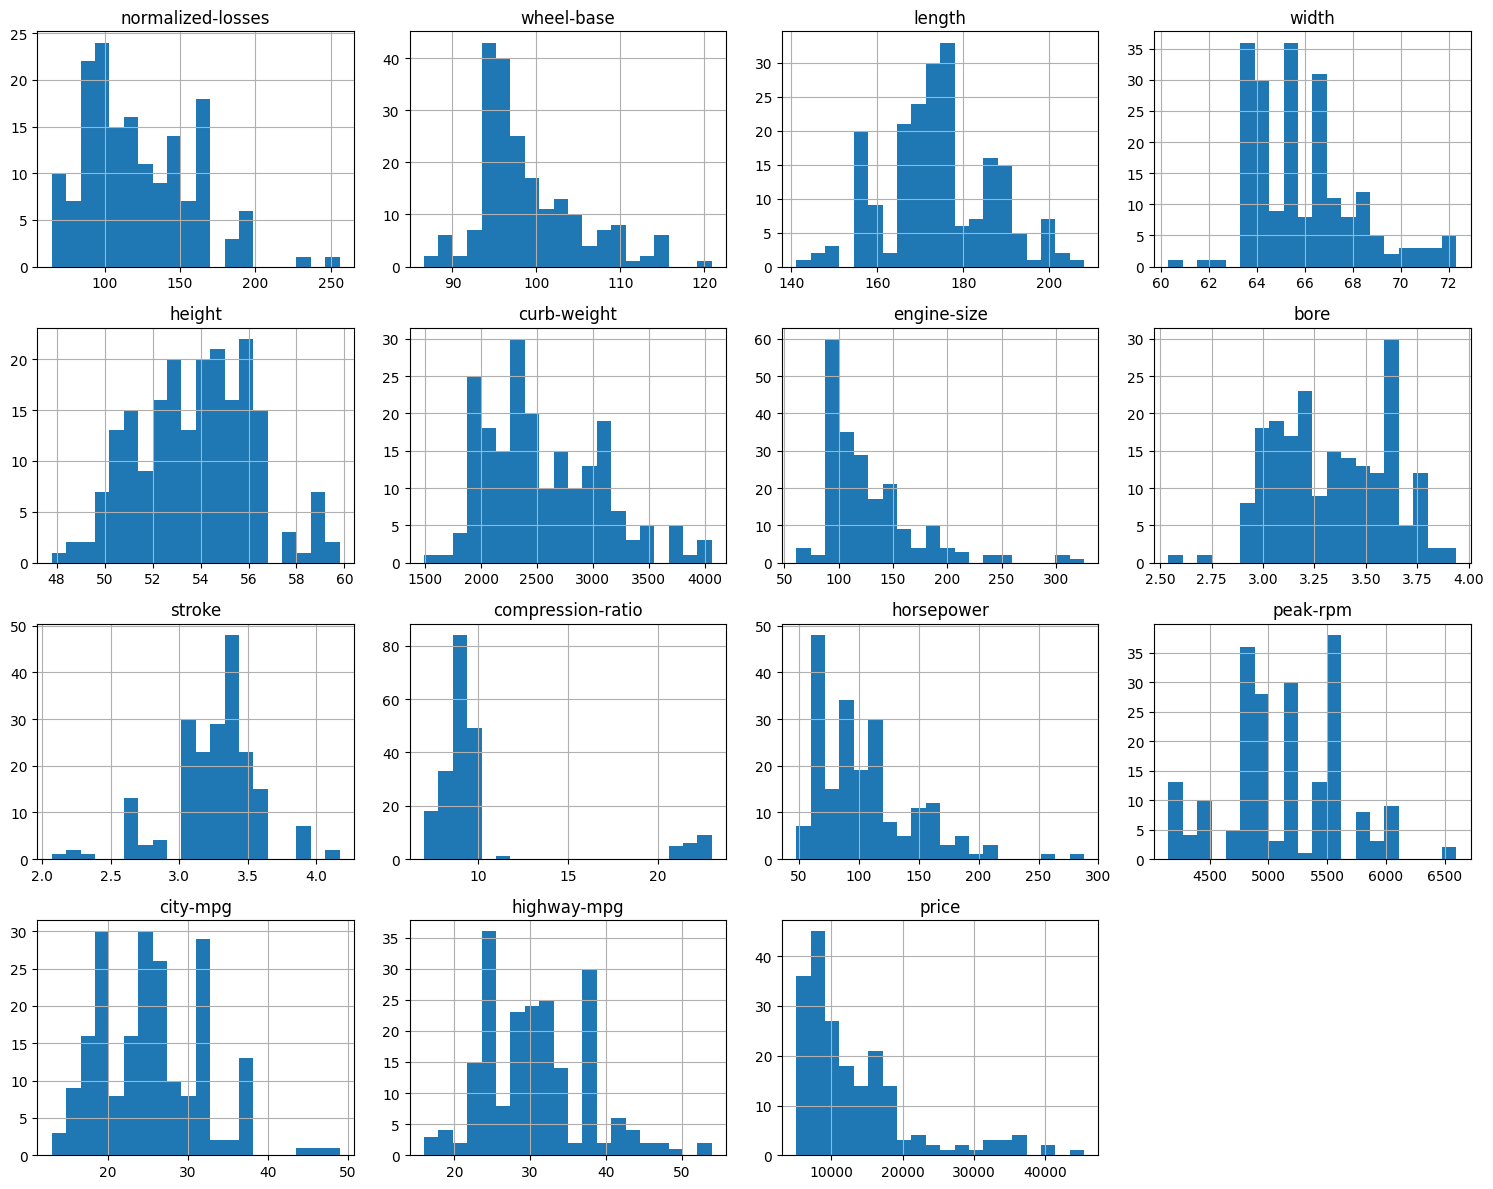

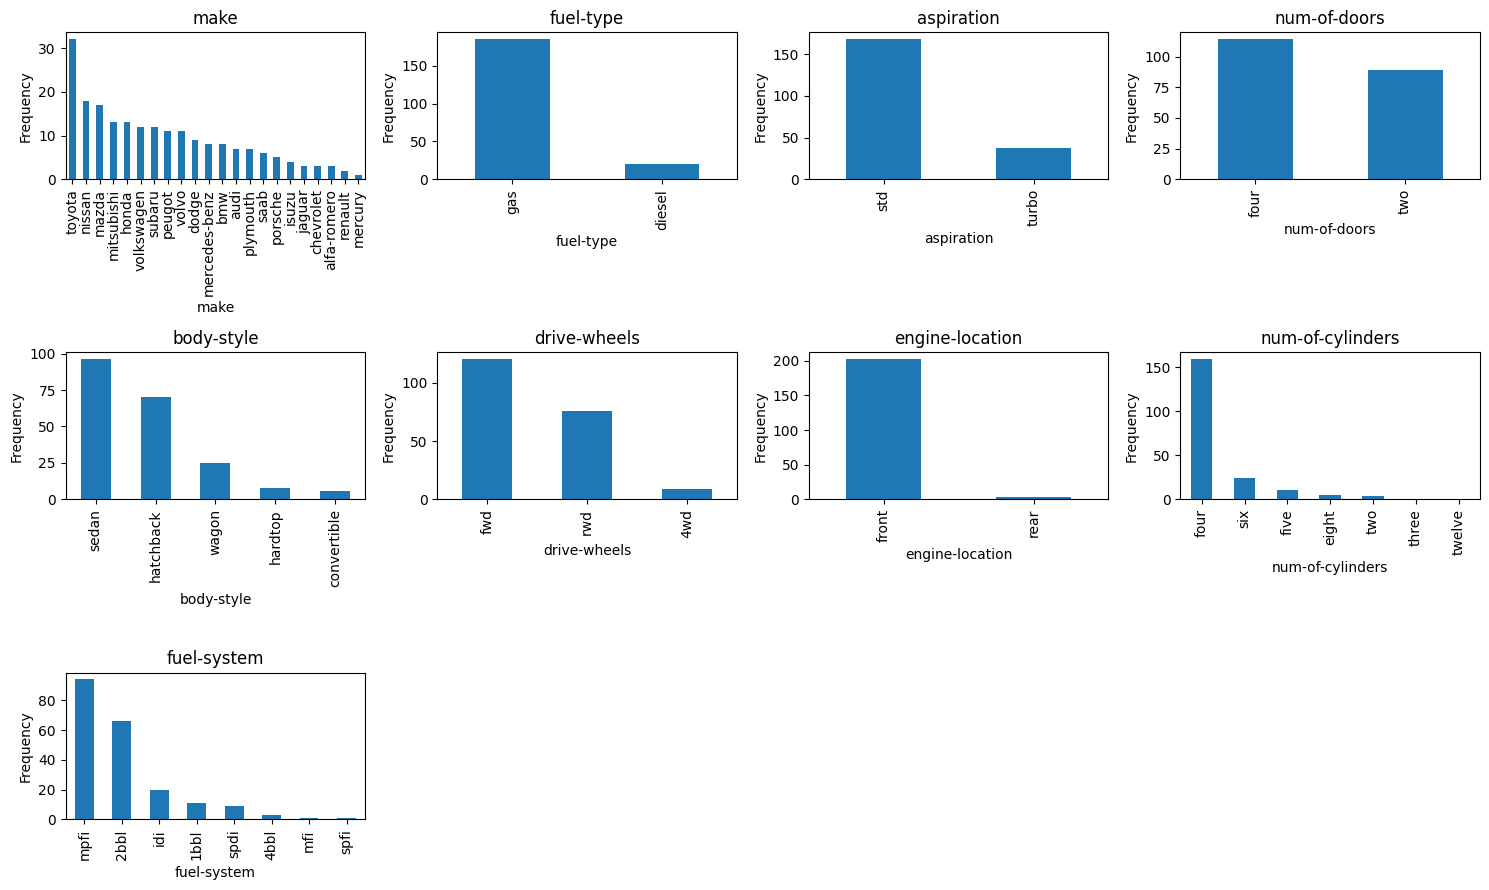

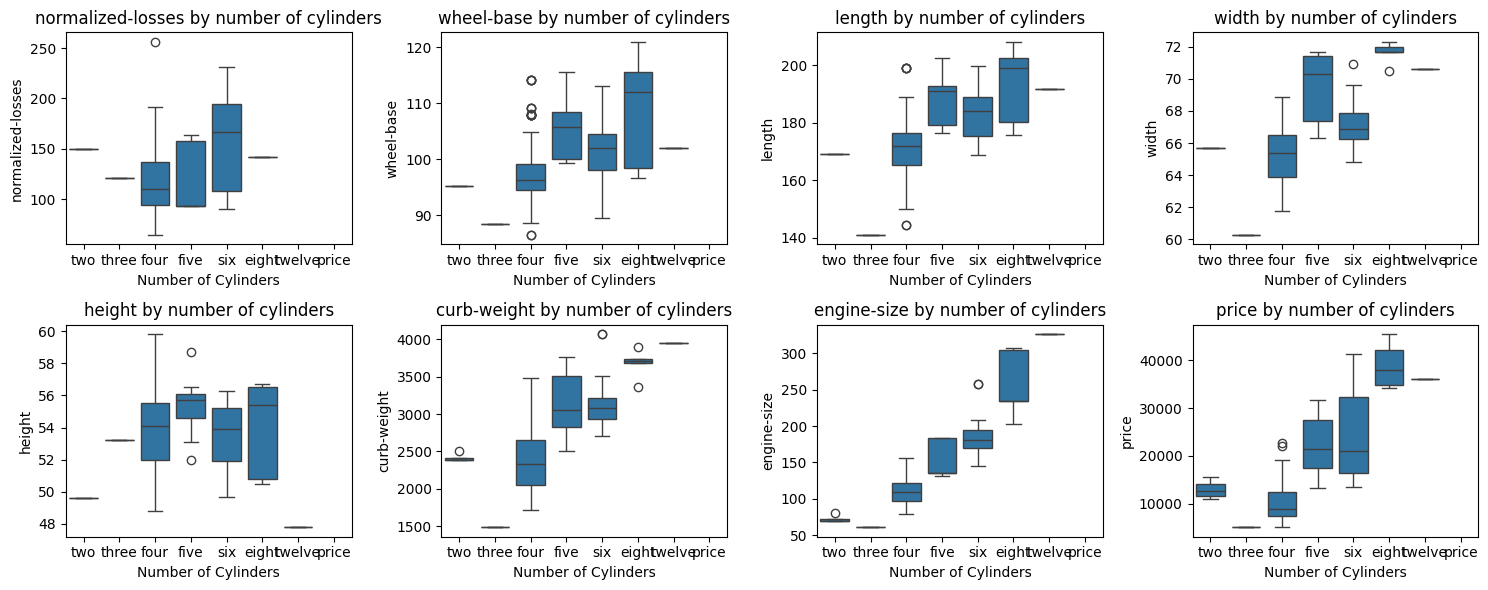

In [163]:
# Visualise the distributions using histograms, box plots, or other suitable plots.

# Summary Statistics
numerical_features = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
summary_stats = df[numerical_features].describe().round(2)
print(summary_stats)

# Histograms
num_numerical_features = len(numerical_features)
num_rows_hist = (num_numerical_features - 1) // 4 + 1
fig, axes = plt.subplots(nrows=num_rows_hist, ncols=4, figsize=(15, 3 * num_rows_hist))
for i, feature in enumerate(numerical_features):
    row = i // 4
    col = i % 4
    df[feature].hist(bins=20, ax=axes[row, col])
    axes[row, col].set_title(feature)
# Remove empty subplots
for i in range(num_numerical_features, num_rows_hist * 4):
    fig.delaxes(axes.flatten()[i])
plt.tight_layout()
plt.show()

# Bar Plots
categorical_features = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'num-of-cylinders', 'fuel-system']
num_categorical_features = len(categorical_features)
num_rows_bar = (num_categorical_features - 1) // 4 + 1
fig, axes = plt.subplots(nrows=num_rows_bar, ncols=4, figsize=(15, 3 * num_rows_bar))
for i, feature in enumerate(categorical_features):
    row = i // 4
    col = i % 4
    df[feature].value_counts().plot(kind='bar', ax=axes[row, col])
    axes[row, col].set_title(feature)
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].set_xlabel(feature)
# Remove empty subplots
for i in range(num_categorical_features, num_rows_bar * 4):
    fig.delaxes(axes.flatten()[i])
plt.tight_layout()
plt.show()

# Group box plots by 'num-of-cylinders' sorted
numerical_features = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'price']
num_numerical_features = len(numerical_features)
num_rows_box = (num_numerical_features - 1) // 4 + 1
fig, axes = plt.subplots(nrows=num_rows_box, ncols=4, figsize=(15, 3 * num_rows_box))  # Adjusted figsize
for i, feature in enumerate(numerical_features):
    row = i // 4
    col = i % 4
    sns.boxplot(x=df['num-of-cylinders'], y=feature, data=df, ax=axes[row, col], order=['two', 'three', 'four', 'five', 'six', 'eight', 'twelve', 'price'])
    axes[row, col].set_title(f'{feature} by number of cylinders')
    axes[row, col].set_xlabel('Number of Cylinders')
    axes[row, col].set_ylabel(feature)
# Remove empty subplots
for i in range(num_numerical_features, num_rows_box * 4):
    fig.delaxes(axes.flatten()[i])
plt.tight_layout()
plt.show()

---
# Breakout Session 2
Bivariate Analysis to investigate relationships between pairs of features and their impact on car prices.​

### Objective: ​

To investigate the relationships between different features and their impact on car prices​

### Agenda:​

Data Exploration Techniques: Review scatter plots to visualise relationships between pairs of features. Utilise box plots to identify variations in car prices across different feature categories.​

Correlation Analysis: Conduct correlation analysis to quantify the strength and direction of relationships between numerical features and car prices. Discuss the significance of correlation coefficients in understanding feature impacts.​

Findings on Feature Impact on Car Prices: Analyse scatter plots and box plots to discern patterns and trends in feature-price relationships. Discuss the impact of specific feature pairs on car prices, including both positive and negative correlations.​

Insights and Recommendations: Derive insights into the most influential features affecting car prices. Formulate recommendations for feature highlighting and pricing strategies based on the findings.

### Deliverables:

Scatter plots and box plots illustrating feature relationships with car prices.​

Correlation matrix highlighting the strength of associations between features.​

Discussion of findings regarding the impact of feature pairs on car prices.​

Recommendations for feature highlighting and pricing strategies based on the analysis.​

In [164]:
# Investigate relationships between pairs of features and their impact on car prices.



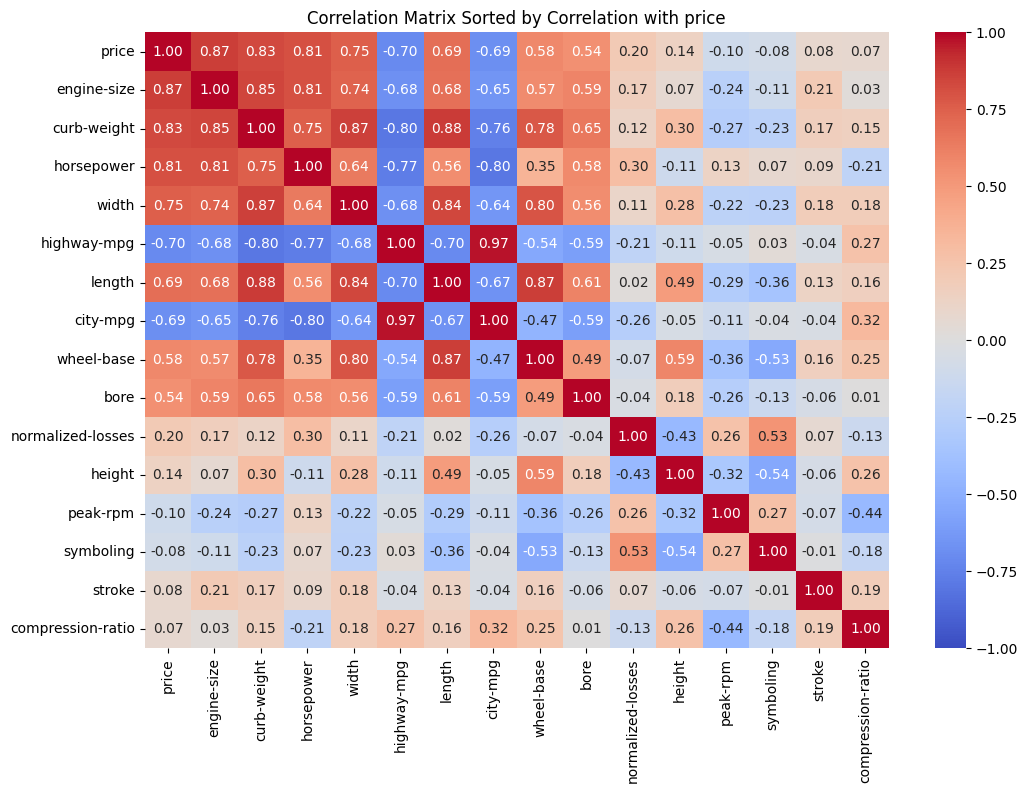

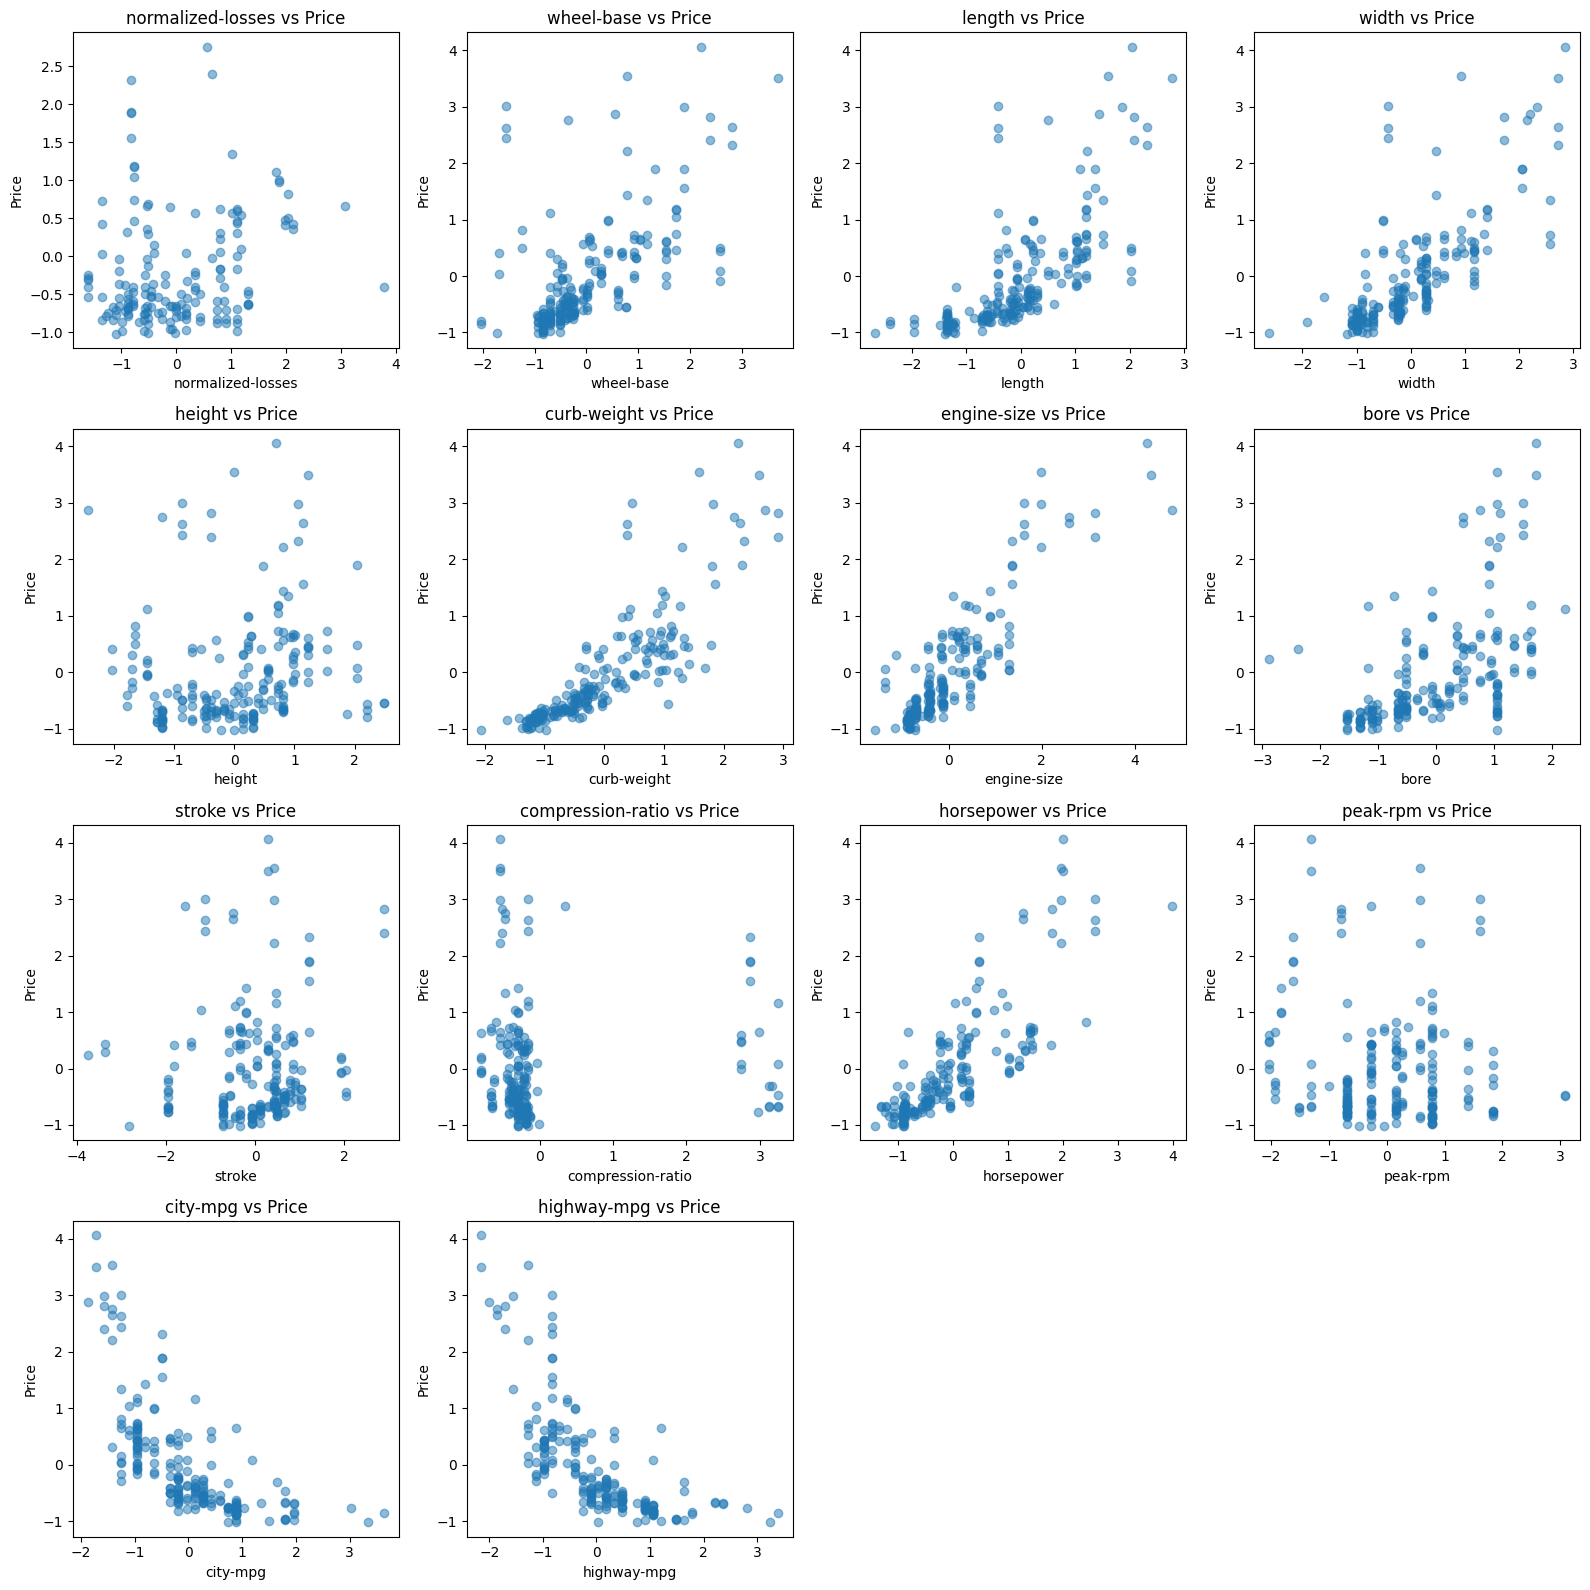

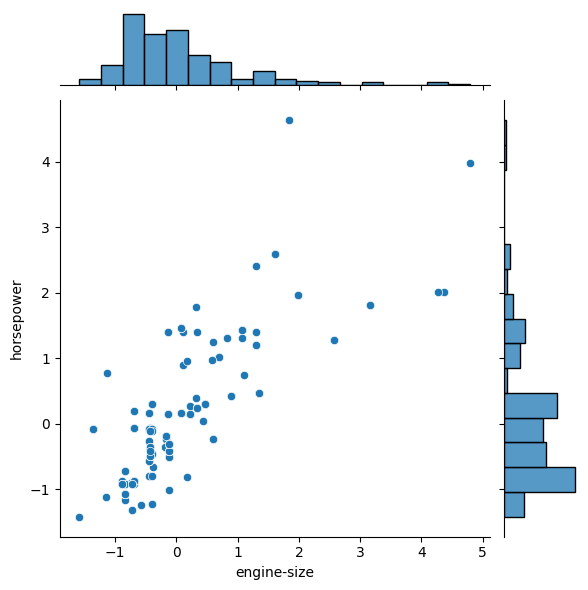

price                1.000000
engine-size          0.872335
curb-weight          0.834415
horsepower           0.810533
width                0.751265
length               0.690628
wheel-base           0.584642
bore                 0.543436
normalized-losses    0.203254
height               0.135486
stroke               0.082310
compression-ratio    0.071107
symboling           -0.082391
peak-rpm            -0.101649
city-mpg            -0.686571
highway-mpg         -0.704692
Name: price, dtype: float64


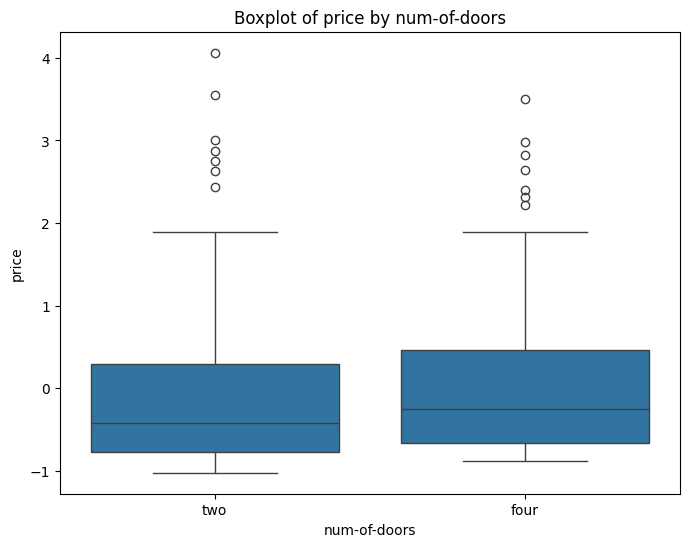

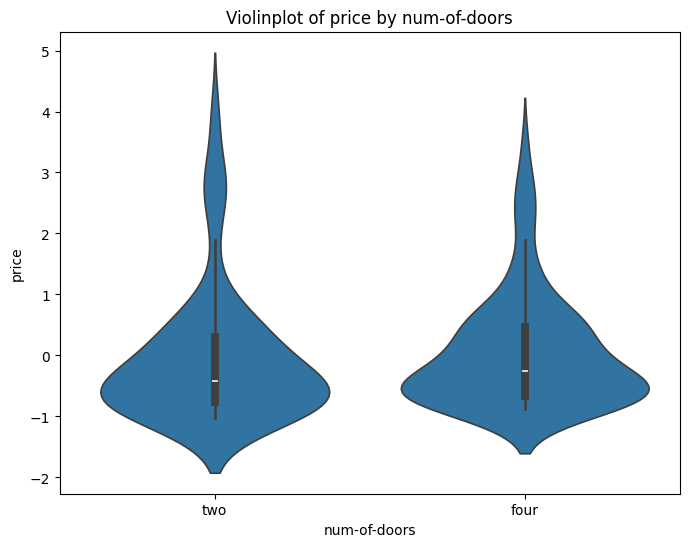

In [172]:

# Calculate correlation matrix
corr_matrix = df.corr(numeric_only=True)


# Sort correlation matrix based on correlations with a specific feature (e.g., 'price')
target_feature = 'price'
sorted_corr = corr_matrix[target_feature].abs().sort_values(ascending=False)
corr_matrix_sorted = corr_matrix.loc[sorted_corr.index, sorted_corr.index]

# Plot sorted heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_sorted, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title(f'Correlation Matrix Sorted by Correlation with {target_feature}')
plt.show()

# Select numerical features (excluding 'price')
numerical_features = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']

# Calculate number of plots needed
num_features = len(numerical_features)
num_cols = 4
num_rows = (num_features - 1) // num_cols + 1

# Create subplots for scatter plots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, num_rows*4))
for i, feature in enumerate(numerical_features):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].scatter(df[feature], df['price'], alpha=0.5)
    axes[row, col].set_title(f'{feature} vs Price')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Price')

# Remove empty subplots
if num_features < num_cols * num_rows:
    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

# Adjust layout
plt.tight_layout()
plt.show()

# Select two numerical features
feature1 = 'engine-size'
feature2 = 'horsepower'

# Create jointplot
sns.jointplot(x=feature1, y=feature2, data=df, kind='scatter')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.show()


# Calculate correlation with target variable
corr_with_price = df.select_dtypes(include=['float64', 'int64']).corr()['price'].sort_values(ascending=False)

# Print correlation with price
print(corr_with_price)


# Select categorical and numerical features
categorical_feature = 'num-of-doors'
numerical_feature = 'price'

# Create box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=categorical_feature, y=numerical_feature, data=df)
plt.title(f'Boxplot of {numerical_feature} by {categorical_feature}')
plt.xlabel(categorical_feature)
plt.ylabel(numerical_feature)
plt.show()

# Create violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x=categorical_feature, y=numerical_feature, data=df)
plt.title(f'Violinplot of {numerical_feature} by {categorical_feature}')
plt.xlabel(categorical_feature)
plt.ylabel(numerical_feature)
plt.show()

# Use scatter plots, box plots, or correlation analysis to explore these relationships.

from sklearn.preprocessing import StandardScaler, MinMaxScaler
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        scaler = StandardScaler()  # Use StandardScaler for Z-score normalization
        df[column] = scaler.fit_transform(df[[column]])
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()



<ipython-input-166-541ba138e471>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


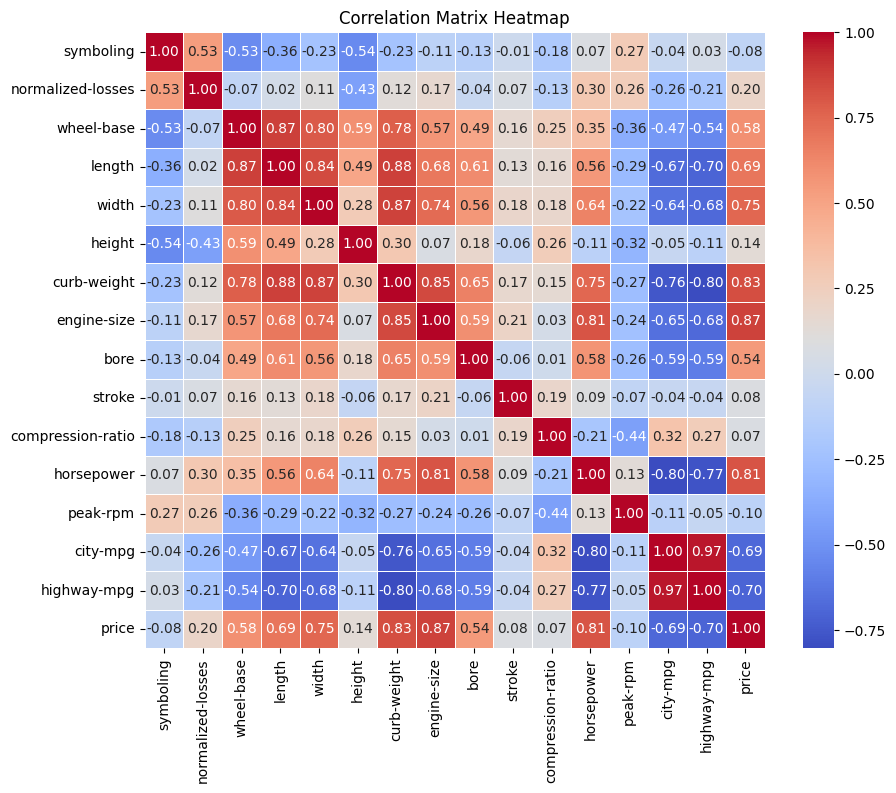

In [166]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        scaler = StandardScaler()  # Use StandardScaler for Z-score normalization
        df[column] = scaler.fit_transform(df[[column]])
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

---
# Breakout Session 3
Customised Plotting to create visualisations tailored to the dataset for enhanced interpretability.

### Objective:

To create tailored visualisations that effectively communicate insights from the dataset and enhance interpretability.​

### Agenda:​

Selecting Plot Types and Customisation Techniques: Review various plot types (e.g., bar charts, line plots, heatmaps) suitable for different data types and relationships. Demonstrate customisation techniques to enhance aesthetics and clarity of visualizations.​

Interpreting Visualizations: Discuss key insights derived from the visualisations. Analysing patterns, trends, and outliers revealed by the customized visualizations.​

### Deliverables:

Customised visualizations tailored to the dataset, including bar charts, line plots, scatter plots, and heatmaps.​

Aesthetic enhancements such as color coding, labeling, and annotations for clarity.​

Interpretation of insights gleaned from the visualizations, with a focus on actionable takeaways.​

In [167]:
# Create customised visualizations tailored to the dataset to enhance interpretability.


In [168]:
# Select appropriate plot types and customise their aesthetics for clarity.
...

---
# Breakout Session 4
Dimensionality Reduction & Key Findings to apply PCA for dimensionality reduction and summarise key insights.​

### Objective:

To identify key factors driving price variance using Principal Component Analysis (PCA).​

### Agenda:​

PCA Implementation and Interpretation: Apply PCA on the dataset to identify principal components. Interpret of PCA results, including variance explained by each component and loadings of original features.​

Key Insights from PCA Analysis: Discuss key insights derived from PCA, including dominant factors influencing price variance. Identify of significant features contributing to each principal component.​

Recommendations for Pricing Strategies: Formulate segmented pricing strategies based on identified factors influencing price variance. Discuss pricing adjustments and promotions tailored to different customer segments.​

### Deliverables:


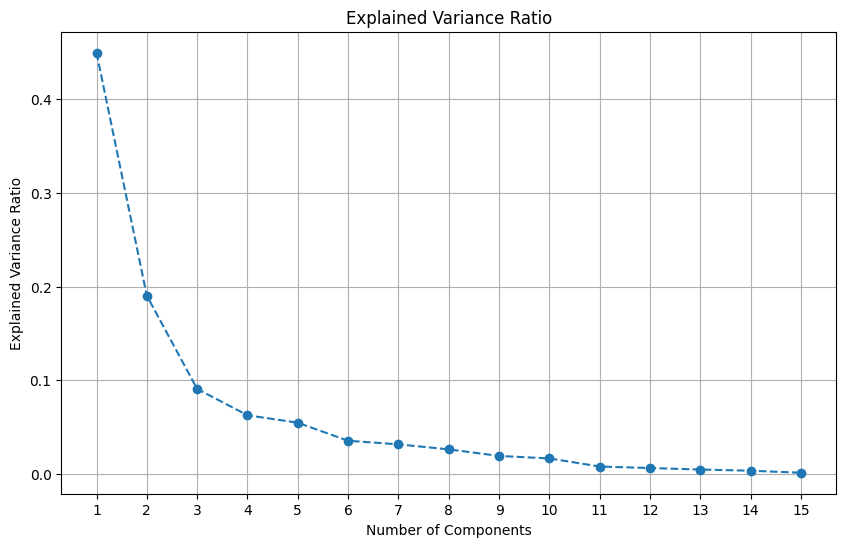

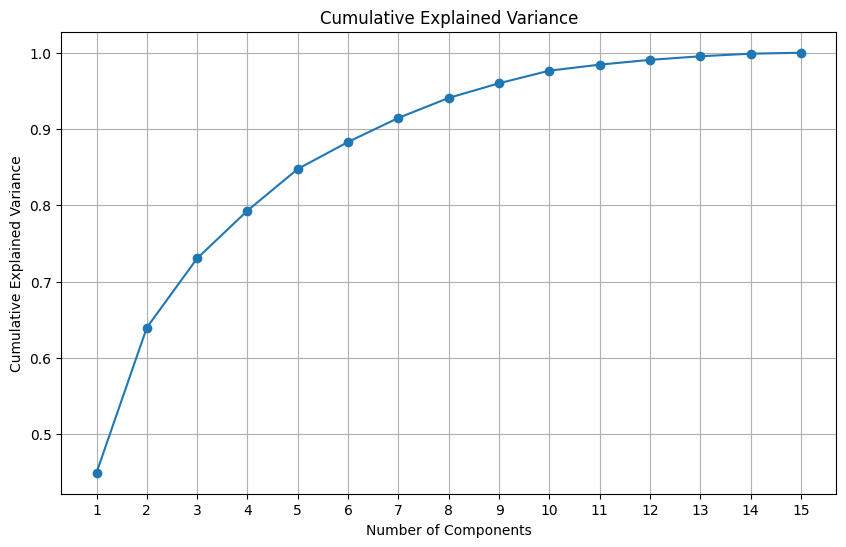

Number of components to retain: 7


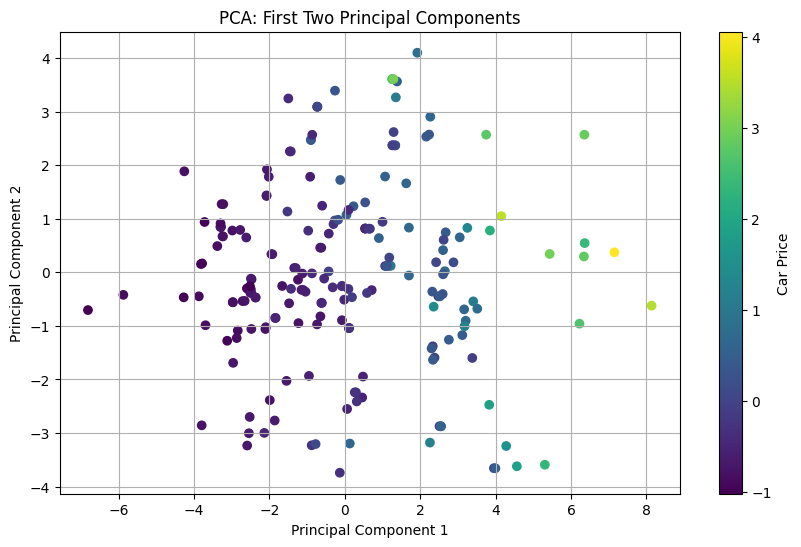

Top positive loadings for PC1:
                  PC1       PC2       PC3       PC4       PC5       PC6  \
curb-weight  0.968089 -0.017691  0.107223  0.031168  0.014512  0.059990   
length       0.918896 -0.206615 -0.014416 -0.052267  0.173432 -0.038967   
width        0.896246 -0.074721  0.143614 -0.038872  0.096565  0.129818   

                  PC7  
curb-weight  0.012649  
length      -0.045813  
width        0.037528  
Top negative loadings for PC1:
                  PC1       PC2       PC3       PC4       PC5       PC6  \
highway-mpg -0.854478 -0.359852  0.185685  0.068007 -0.024455  0.091219   
city-mpg    -0.823103 -0.444876  0.189455  0.066119 -0.012447  0.093665   
symboling   -0.268443  0.685293  0.344053  0.282801  0.078413 -0.093828   

                  PC7  
highway-mpg  0.100008  
city-mpg     0.122122  
symboling   -0.429364  

Top positive loadings for PC2:
                        PC1       PC2       PC3       PC4       PC5       PC6  \
symboling         -0.268443  0.

In [173]:
# Apply Principal Component Analysis (PCA) to reduce the dimensionality of the dataset.
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Exclude non-numeric columns and price from numeric_cols
numeric_cols = df.select_dtypes(include=np.number).drop(columns=['price']).columns

# Impute missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df[numeric_cols]), columns=numeric_cols)

# Standardize the numeric features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

# Apply PCA
pca = PCA()
pca.fit(df_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(np.arange(1, len(cumulative_explained_variance) + 1))
plt.grid(True)
plt.show()

# Determine the number of components to retain
n_components = np.argmax(cumulative_explained_variance >= 0.9) + 1
print("Number of components to retain:", n_components)

# Apply PCA with the determined number of components
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df_scaled)

# Visualize the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['price'], cmap='viridis')
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Car Price')
plt.grid(True)
plt.show()

# Get the loadings (coefficients) of original features on each principal component
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create a DataFrame to show loadings
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(n_components)], index=numeric_cols)

# Show the top positive and negative loadings for each principal component
for i in range(n_components):
    print(f"Top positive loadings for PC{i+1}:")
    print(loadings_df.sort_values(by=f'PC{i+1}', ascending=False).head(3))
    print(f"Top negative loadings for PC{i+1}:")
    print(loadings_df.sort_values(by=f'PC{i+1}', ascending=True).head(3))
    print()


In [170]:
# Identify key factors influencing price variance using PCA.
...